# Division of training data and test data

With the dataset already consolidated, we proceed to select the training, validation and test samples

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/Neuronal-Networks-with-Keras-Old/'
%ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Neuronal-Networks-with-Keras-Old
'11.-Clasificación Binaria.ipynb'
'3.-Estructura de redes neuronales.ipynb'
'4.-Creando nuestra primer red neuronal.ipynb'
 datasets/
'Design, Training and Evaluation of the Model.ipynb'
'Feature Engineering.ipynb'


In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [ ]:
variables_consolidadas = pd.read_parquet('./datasets/variables_consolidadas.parquet')
variables_consolidadas.shape

(2197291, 178)

In [ ]:
objetivo = variables_consolidadas['outcome']
variables_consolidadas.drop('outcome', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

#Training and testing with 80:20 ratio 
x_train, x_test, y_train, y_test = train_test_split(variables_consolidadas,objetivo, test_size=0.2,random_state=2020)
#Training and validation with 90:10 ratio 
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=2020)

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (1582048, 177)
Shape of x_test: (439459, 177)
Shape of x_val: (175784, 177)
Shape of y_train: (1582048,)
Shape of y_test: (439459,)
Shape of y_val: (175784,)


# Proposed Architecture

Considerations before modeling our neural network:

* Since the problem consists of a binary classifier, the most recommended loss function is binary_crossentropy.

* Similarly an activation function that suits the type of problem is the sigmoid.

* The metric for evaluation will be the precision accuracy

* Due to the large amount of information the training will take longer, in this scenario smaller architectures will be implemented with few training periods and the model will be scaled as the accuracy results improve.

* The number of neurons per layer was chosen again following the empirical rule.

### Neural network of a hidden layer 

In [ ]:
#Red neuronal pequeña
model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) 
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               45568     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 111,617
Trainable params: 111,617
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 50s 2ms/step - loss: 1246.3628 - accuracy: 0.6147 - val_loss: 0.6443 - val_accuracy: 0.6101
Epoch 2/3
24720/24720 [==============================] - 49s 2ms/step - loss: 0.6711 - accuracy: 0.5852 - val_loss: 0.6866 - val_accuracy: 0.5573
Epoch 3/3
24720/24720 [==============================] - 50s 2ms/step - loss: 0.6868 - accuracy: 0.5566 - val_loss: 0.6866 - val_accuracy: 0.5573


* Accuracies have not changed much, so the network is not learning.

* An accuracy of 50% is equivalent to sorting at random.

* The number of hidden layers will be increased to add non-linear functions that allow a better classification and better accuracy.

## Hidden 2-layer neural network

In [ ]:
#Red neuronal de 2 capas
model = Sequential()
model.add(Dense(512,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 52s 2ms/step - loss: 512.1251 - accuracy: 0.5501 - val_loss: 0.6866 - val_accuracy: 0.5573
Epoch 2/3
24720/24720 [==============================] - 51s 2ms/step - loss: 0.6869 - accuracy: 0.5562 - val_loss: 0.6866 - val_accuracy: 0.5573
Epoch 3/3
24720/24720 [==============================] - 51s 2ms/step - loss: 0.6867 - accuracy: 0.5568 - val_loss: 0.6866 - val_accuracy: 0.5573


Despite scaling up the size of the network, the results are still disappointing. In this case, the best step to follow is to revalidate the available data. At this point there are two options to explore:

* Standardize the available numerical variables.
* Perform the One Hot Encoding again.

# Standardization

It consists of ensuring that the data are consistent with each other; that is, each type of data has the same content and format. Standardized values are useful for training data that do not have the same scales, or that measure different variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) # only with x_train because y_train is already standardized (outcome)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


print(x_train.shape)
print(y_train.shape)

(1582048, 177)
(1582048,)


In [ ]:
#Red neuronal de 2 capas
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 52s 2ms/step - loss: 0.2411 - accuracy: 0.8904 - val_loss: 0.1455 - val_accuracy: 0.9396
Epoch 2/3
24720/24720 [==============================] - 50s 2ms/step - loss: 0.1274 - accuracy: 0.9477 - val_loss: 0.1070 - val_accuracy: 0.9569
Epoch 3/3
24720/24720 [==============================] - 51s 2ms/step - loss: 0.0955 - accuracy: 0.9620 - val_loss: 0.0918 - val_accuracy: 0.9647


With only the standardization of the information, the performance of the model has improved dramatically, achieving an accuracy of 96%! We could continue to evaluate larger networks, but it is an acceptable value for us for now.

The performance with the test set is still good, so we can already use the defined architecture and carry out training with a greater number of epochs.

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
history = model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=12, batch_size=64)

Epoch 1/12
24720/24720 [==============================] - 51s 2ms/step - loss: 0.2420 - accuracy: 0.8902 - val_loss: 0.1456 - val_accuracy: 0.9391
Epoch 2/12
24720/24720 [==============================] - 51s 2ms/step - loss: 0.1277 - accuracy: 0.9477 - val_loss: 0.1062 - val_accuracy: 0.9586
Epoch 3/12
24720/24720 [==============================] - 51s 2ms/step - loss: 0.0949 - accuracy: 0.9625 - val_loss: 0.0948 - val_accuracy: 0.9637
Epoch 4/12
24720/24720 [==============================] - 51s 2ms/step - loss: 0.0777 - accuracy: 0.9697 - val_loss: 0.0792 - val_accuracy: 0.9706
Epoch 5/12
24720/24720 [==============================] - 50s 2ms/step - loss: 0.0676 - accuracy: 0.9738 - val_loss: 0.0780 - val_accuracy: 0.9713
Epoch 6/12
24720/24720 [==============================] - 50s 2ms/step - loss: 0.0610 - accuracy: 0.9767 - val_loss: 0.0714 - val_accuracy: 0.9755
Epoch 7/12
24720/24720 [==============================] - 50s 2ms/step - loss: 0.0558 - accuracy: 0.9786 - val_loss: 0

The next step is to test this same model with information that the network has never seen (test set)

In [ ]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",
str(round(result[i],2)))

13734/13734 [==============================] - 19s 1ms/step - loss: 0.0658 - accuracy: 0.9782
Metric  loss : 0.07
Metric  accuracy : 0.98


# Model evaluation

The network has managed to improve its performance a bit with more training periods. Finally, we are going to graphically evaluate the performance of the loss function and the accuracy through each training season in order to validate any possible over-training (overfitting).

PS: An indication that there is overfitting is when as the complexity of the neural network increases, the cost function of the training set closely matches the cost function of the test set, and then these two functions they start to diverge

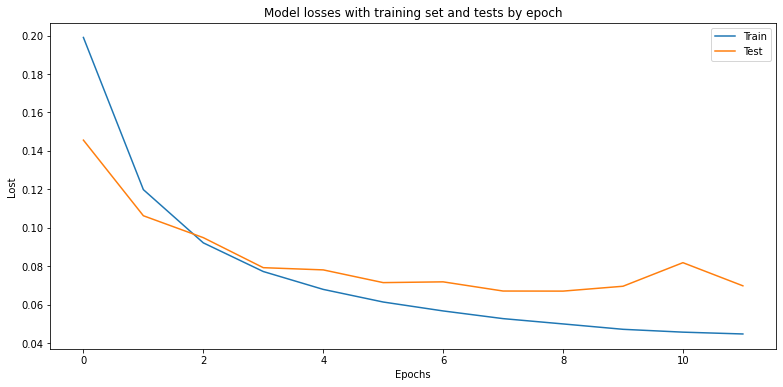

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model losses with training set and tests by epoch")
plt.ylabel('Lost')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

It can be seen that the loss function diminishes as the number of Epochs increases with both the training information and the validation information. There is no significant separation between these two lines that indicates the presence of over-fit, so it can be said that the performance of the model is satisfactory.

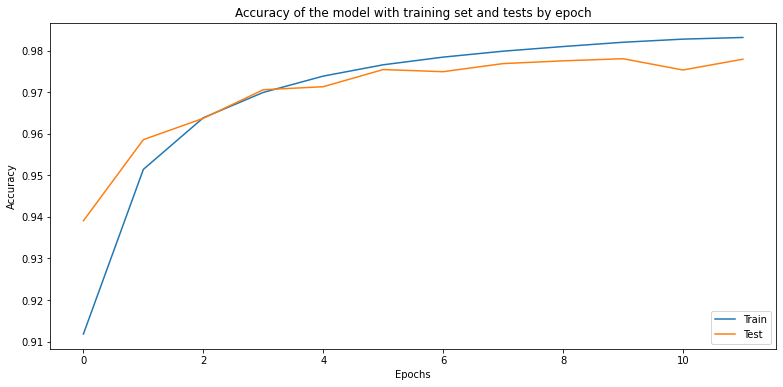

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy of the model with training set and tests by epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

Similarly, the accuracy results have similar values in the training and validation set, and their graphs do not show signs of overfitting. In both cases, it is shown that the model has greater accuracy when the 10 training epochs are surpassed.